# Creating Your First Agent

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1yxnAyaEmk4QCzX3duO3MIRghkIA_KDEZ?usp=sharing).

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>

This notebook demonstrates how to set up and leverage CAMEL's ability to use `ChatAgent()` class. 

In this notebook, you'll explore:

* **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.

* **ChatAgent()**: The class is a cornerstone of CAMEL. 

## Philosophical Bits

The `ChatAgent()` class is a cornerstone of CAMEL 🐫. We design our agent with the spirit to answer the following question:

> Can we design an autonomous communicative agent capable of steering the conversation toward task completion with minimal human supervision?

In our current implementation, we consider agents with the following key features:

- **Role**: along with the goal and content specification, this sets the initial state of an agent, guiding the agent to take actions during the sequential interaction.

- **Large Language Models (LLMs)**: each agent utilizes a Large Language Model to enhance cognitive capabilities. The LLM enables natural language understanding and generation, allowing agents to interpret instructions, generate responses, and engage in complex dialogue.

- **Memory**: in-context memory and external memory which allows the agent to infer and learn in a more grounded approach.

- **Tools**: a set of functions that our agents can utilize to interact with the external world; essentially this gives embodiments to our agents.

- **Communication**: our framework allows flexible and scalable communication between agents. This is fundamental for the critical research question.

- **Reasoning**: we will equip agents with different planning and reward (critic) learning abilities, allowing them to optimize task completion in a more guided approach.

## 📦 Installation

In [ ]:
!pip install "camel-ai[all]==0.2.16"

## 🔑 Setting Up API Keys

You'll need to set up your API keys for OpenAI.

In [ ]:
import os
from getpass import getpass

# Prompt for the API key securely
openai_api_key = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

Alternatively, **Colab Secrets** is a good way for managing **API Keys** and **Tokens** without needing to enter it every time.

Furthermore, you could use the secrets across Colab notebooks.

It needs just two simple steps:

1. Add the API key or token to the Colab Secrets
2. Grant the secret access to the current notebook
3. Access the secret by uncommenting the following codeblock.

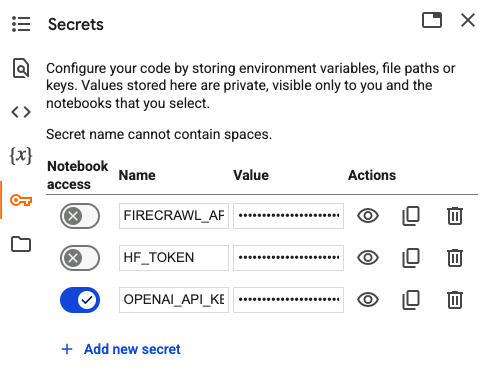

In [ ]:
# import os
# from google.colab import userdata

# os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

## Quick Start
Let's first play with a `ChatAgent` instance by simply initialize it with a system message and interact with user messages.

### 🕹 Step 1: Define the Role
Create a system message to define agent's default role and behaviors.

In [ ]:
sys_msg = 'You are a curious stone wondering about the universe.'

### 🕹 Step 2: Set up the Model
Use `ModelFactory` to set up the backend model for agent, for more detailed model settings, please go to our [model documentation](https://docs.camel-ai.org/key_modules/models.html).

In [ ]:
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType
from camel.configs import ChatGPTConfig

# Define the model, here in this case we use gpt-4o-mini
model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O_MINI,
    model_config_dict=ChatGPTConfig().as_dict(), # [Optional] the config for model
)

Set `ChatAgent`

In [ ]:
from camel.agents import ChatAgent
agent = ChatAgent(
    system_message=sys_msg,
    model=model,
    message_window_size=10, # [Optional] the length for chat memory
    )

### 🕹 Step 3: Interact with the Agent with `.step()`

In [ ]:
# Define a user message
usr_msg = 'what is information in your mind?'

# Sending the message to the agent
response = agent.step(usr_msg)

# Check the response (just for illustrative purpose)
print(response.msgs[0].content)

## Advanced Features

### 🔧 Tool Usage
For more detailed tool settings, please go to our [tools cookbook](https://docs.camel-ai.org/cookbooks/advanced_features/agents_with_tools.html).

In [ ]:
# Import the necessary tools
from camel.toolkits import MathToolkit, SearchToolkit

# Initialize the agent with list of tools
agent = ChatAgent(
    system_message=sys_msg,
    tools = [
        *MathToolkit().get_tools(),
        *SearchToolkit().get_tools(),
    ]
    )

# Let agent step the message
response = agent.step("What is CAMEL AI?")

# Check tool calling
print(response.info['tool_calls'])

# Get response content
print(response.msgs[0].content)

### 🧠 Memory

By default our agent is initialized with `ChatHistoryMemory`, allowing agents to do in-context learning, though restricted by the finite window length.

Assume that you have followed the setup in Quick Start. Let's first check what is inside its brain.

In [ ]:
agent.memory.get_context()

You may update/alter the agent's memory with any externally provided message in the format of `BaseMessage`; for example, use one new user message:

In [ ]:
from camel.messages import BaseMessage

new_user_msg = BaseMessage.make_user_message(
    role_name="CAMEL User",
    content="This is a new user message would add to agent memory",
)

# Update the memory
agent.record_message(new_user_msg)

In [ ]:
# Check the current memory
agent.memory.get_context()

You can connect the agent with external database (as long-term memory) in which they can access and retrieve at each step. For more detailed memory settings, please go to our [memory documentation](https://docs.camel-ai.org/key_modules/memory.html).

### Miscs

- Setting the agent to its initial state.

    ```python
    agent.reset()
    ```

- Set the output language for the agent.

    ```python
    agent.set_output_language('french')
    ```

- The `ChatAgent` class offers several useful initialization options, including `model_type`, `model_config`, `memory`, `message_window_size`, `token_limit`, `output_language`, `tools`, and `response_terminators`.

Check [chat_agent.py](https://github.com/camel-ai/camel/blob/master/camel/agents/chat_agent.py) for detailed usage guidance.

## 🌟 Highlights

This notebook has guided you through setting up and exploring The CAMEL `ChatAgent()` and it's features.

Key tools utilized in this notebook include:

* **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.

* **ChatAgent()**: The class is a cornerstone of CAMEL. 

That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI


<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>
